In [34]:
# 格力电器 000651
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# in_dir = '/home/kayzhou/Project/Guba_spider/guba/data'
# in_name = '/home/kayzhou/Project/Guba_spider/guba/data/000651.txt'

# 
# _list_len = []
# for i, in_name in enumerate(os.listdir(in_dir)):
#     print(i)
#     if i > 10:
#         break
#     in_name = os.path.join(in_dir, in_name)
#     for j, line in enumerate(open(in_name)):
# #         print(line)
#         try:
#             _list_len.append(len(json.loads(line)['content']))
#         except:
# #             print('Q&A')
#             pass

def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

_lens = [int(line.strip()) for line in open('data/content_len.txt') if int(line.strip()) < 10e3]
print('数据加载完成 ...')
x, cdf, pdf = get_cdf_pdf(_lens, 0, 1000, 10)
plt.plot(x, pdf)
plt.yscale('log')
plt.show()


_lens = pd.Series(_lens)
print(_lens.min(), _lens.max())
print(_lens.describe())



ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/home/kayzhou/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-34-d015a50a5649>", line 51, in <module>
    _lens = [int(line.strip()) for line in open('data/content_len.txt') if int(line.strip()) < 10e3]
FileNotFoundError: [Errno 2] No such file or directory: 'data/content_len.txt'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kayzhou/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 1821, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'FileNotFoundError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/home/kayzhou/anaconda3/lib/python3.6/site-packages/IPython/core/ultratb.py", line 1132, in

FileNotFoundError: [Errno 2] No such file or directory: 'data/content_len.txt'

数据加载完成 ...
0.0 1.0
10.0 0.6824949082304188
20.0 0.3908336374660058
30.0 0.2406674436765912
40.0 0.177426684404469
50.0 0.14249027756521193
60.0 0.12091373227691378
70.0 0.10610423705866424
80.0 0.09494119447616581
90.0 0.08621199813203674
100.0 0.07929190065260985
110.0 0.07361580391094995
120.0 0.06864686468646865
130.0 0.06425165703252846
140.0 0.06017039278244114
150.0 0.05704744077261472
160.0 0.05413875513591787
170.0 0.051587180121103665
180.0 0.049217692280524125
190.0 0.04706168595456454
200.0 0.04518273468250511
210.0 0.04324491902222327
220.0 0.04148526624362793
230.0 0.039990110782778636
240.0 0.03844943352837067
250.0 0.0367839637709312
260.0 0.03531784807493829
270.0 0.03391373620120633
280.0 0.031890370963374576
290.0 0.02958210208654635
300.0 0.028023373086416847
310.0 0.026443452906527276
320.0 0.024803098621396028
330.0 0.02379769487055721
340.0 0.022923362490826965
350.0 0.02218873492581125
360.0 0.021529453777720222
370.0 0.020804244514820092
380.0 0.0201590908199024

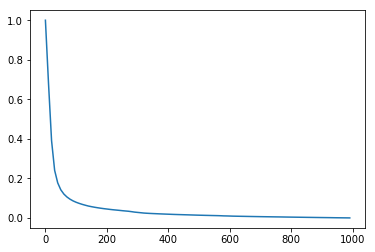

0 699523
count    1.294103e+06
mean     7.769239e+01
std      8.203872e+02
min      0.000000e+00
25%      8.000000e+00
50%      1.500000e+01
75%      3.000000e+01
max      6.995230e+05
dtype: float64


10       48427
9        47765
8        47582
6        47012
7        46803
4        45719
11       44402
5        44237
0        42403
12       42318
13       40118
2        39204
14       38696
15       36199
16       33289
17       31599
3        29486
18       29057
22       28594
19       27505
20       25791
21       23844
23       23052
24       19610
25       17301
26       15217
1        14327
27       13747
28       12597
29       11576
         ...  
5532         1
8393         1
2463         1
3023         1
4003         1
5945         1
3488         1
3272         1
4512         1
10990        1
8610         1
3025         1
5542         1
3493         1
2469         1
4931         1
10052        1
9639         1
2247         1
3905         1
2246         1
4046         1
3270         1
5024         1
10187        1
2249         1
2794         1
5322         1
2467         1
6072         1
Length: 4830, dtype: int64

In [47]:
# 格力电器 000651
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

in_dir = '/home/kayzhou/Project/Guba_analysis/data/tweet'


_list_len = []
for i, in_name in enumerate(os.listdir(in_dir)):
#     print(i)
    if i > 50:
        break
    in_name = os.path.join(in_dir, in_name)
    for j, line in enumerate(open(in_name)):
#         print(line)
        _list_len.append(len(json.loads(line)['content']))
    

def get_cdf_pdf(data, mini, maxi, step, norm=True):
    x = [float(i) for i in np.arange(mini, maxi, step)]
    cdf = [0] * len(x)
    pdf = [0] * len(x)
    count = 0
    for d in data:
        d = float(d)
        if d < mini or d > maxi:
            continue
        count += 1
        for i in range(len(x)):
            if i == (len(x) - 1) and d >= x[i]:
                pdf[i] += 1
            elif d >= x[i] and d < x[i+1]:
                pdf[i] += 1

            if d >= x[i]:
                cdf[i] += 1

    if norm:
        cdf = [c / count for c in cdf]
        pdf = [p / count for p in pdf]

    return x, cdf, pdf

    
_lens = pd.Series(_list_len)
# _lens = [int(line.strip()) for line in open('data/content_len.txt') if int(line.strip()) < 10e3]
print('数据加载完成 ...')
x, cdf, pdf = get_cdf_pdf(_lens, 0, 1000, 10)
for k, v in zip(x, cdf):
    print(k, v)
plt.plot(x, cdf)
# plt.yscale('log')
plt.show()

print(_lens.min(), _lens.max())
print(_lens.describe())
_lens.value_counts()
